# TDI-Project Proposal;  April 24, 2020

Compiled by: ***Alem H Fitwi***, 
      - GA-Data Analyst (using OracleSQL, SAS, SQLite, and Python3)
      - PhD Candidate in Computer Engineering
   
   Reserach Areas:        
        <ul>
            <li>Privacy in Mechanical Surveillance Systems,</li>
            <li>Machine Learning, Deep Learning,</li>
            <li>Networking (Edge Computing) and IoD</li>            
         </ul>
    Binghamton University-State University of New York    
                        Since August 23, 2017 

# <font color='green'>0. Brief Project Description</font>

Universities receive a large volume of applications for admission in Fall or Spring terms from around the globe. Then, they use more or less similar criteria to separate the wheat from the chaff. Some of the most commonly used yardsticks include CGPA, GRE, TOEFL, Letter of recommendations (LOR), university rating, research-making skill and experience, and statement of purpose (SOP). 

Processing these large volume of applications manually by admission committees is a daunting and meticulous task. Besides, the committee are prone to making mistakes and they may weed out brighter applicants. Hence, employing machine learning and statistical tools trained based on historical data can at least partly help the committee  make sound decisions in the selection process following the proper rating of qualitative data points like ROC, SOP, etc.

My prime goal in this project is to build a machine learning model that can predict the probability of admission of an applicant based on the aforementioned seven parameters, provided in an open Kaggle data-set for graduate admission prediction with an output variable named "offer". I opted to build a machine learning model for the prediction process based on Logistic regression because it is more convenient for a yes/no or a binary 0-1 type response. It can be used to model probabilities or for classification. In this project, I built a probabilistic logistic model, also known as logit. 80% of the dataset is used for training the model and the remaining 20%  is used for testing.

# <font color='green'>1. Preliminary Data Processing</font>
### Brief Description of Data points
- GRE Score: recent version scored out of 370 (old version scores are converted to a scale of 170 using standard table)
- TOEFL Score: IBT scored out of 120 (old versions are converted to 120)
- University Rating: rated out of 5
- SOP: rated out of 5
- LOR: rated out of 5
- CGPA: scaled out of 10
- Research: marked 0 or 1
- Chance of Admit: probabilistic value, ranges from 0 to 1

### Check Data Contents

source: https://www.kaggle.com/mohansacharya/graduate-admissions#Admission_Predict_Ver1.1.csv

In [19]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib as mp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from patsy import dmatrices
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline

In [20]:
#Read in data
ga_data = pd.read_csv("./graduate-admissions/Admission_Predict_Ver1.1.csv")

In [21]:
# Data Shape
ga_data.shape

(500, 9)

In [22]:
# Some info about the sample data
ga_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [23]:
# Columns/variables of the dataset
ga_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [24]:
# Make the name of columns brief
ga_data=ga_data.rename(columns={'Serial No.':'no','GRE Score':'gre','TOEFL Score':'toefl',
                                'University Rating':'rating','SOP':'sop','LOR ':'lor','CGPA':'gpa',
                                'Research':'research','Chance of Admit ':'chance'})

In [25]:
ga_data.columns

Index(['no', 'gre', 'toefl', 'rating', 'sop', 'lor', 'gpa', 'research',
       'chance'],
      dtype='object')

In [26]:
#Data type of each column
ga_data.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

In [27]:
# Data size or shape
ga_data.shape

(500, 9)

In [28]:
# Check is there is any missing data
ga_data.isnull().any()

no          False
gre         False
toefl       False
rating      False
sop         False
lor         False
gpa         False
research    False
chance      False
dtype: bool

<font color='red'>Hence, no need of imputation!</font>

In [29]:
# Dssplay data heads or partially
ga_data.head()

,no,gre,toefl,rating,sop,lor,gpa,research,chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### ***Hormonize the various GRE and TOEFL Scores***

In [30]:
#ILETS to TOEFL
def ieltsTotoefl(ielts):
    ielts=float(ielts)
    IELTS2TOEFL = {0.0:16, 1.0:16,2.0:16,3.0:16,
               4.0:16,4.5:33,5.0:40, 5.5:53, 
               6.0:69, 6.0:69,6.5:86,7.0:98,
               7.5:106,8.0:112,8.5:116,9.0:120}
    return IELTS2TOEFL[ielts]

# Convert paper-based toefl to ibt-based toefl
def pbteofl_ibttoefl(pbtoefl):
    pt_to_ibt = {677:120, 673:120,670:119,667:118,663:117,
                 662:117,661:117,660:117,657:116,653:115,
                 652:115,651:114,650:114,647:113,643:112,
                 642:112,641:111,640:111,637:110,633:109,
                 632:109,631:109,630:109,627:108,626:108,
                 625:107,624:107,623:106,620:105,619:105,
                 618:105,617:105,613:104,610:102,609:102,
                 608:101,607:101,603:100,602:100,601:100,
                 600:100,597:99,593:97,592:97,591:96,590:96,
                 587:95,583:93,582:93,581:92,580:92, 577:91,
                 573:89,572:89,571:88,570:88,567:87,563:85,
                 560:83,559:83,558:83,557:83,553:82,550:80,
                 547:78,543:76,542:76,541:76,540:76,537:75}
    return pt_to_ib[pbtoefl]

# A method for converting old GRE scale to revised GRE scale
vold=[800, 790, 780, 770, 760, 750, 740, 730, 720, 710, 700, 690, 680, 670, 660, 
      650, 640, 630, 620, 610, 600, 590, 580, 570, 560, 550, 540, 530, 520, 510, 
      500, 490, 480, 470, 460, 450, 440, 430, 420, 410, 400, 390, 380, 370, 360, 
      350, 340, 330, 320, 310, 300, 290, 280, 270,260, 250, 240, 230, 220, 210, 200]
vnew=[170, 170, 170, 170, 170, 169, 169, 168, 168, 167, 166, 165, 165, 164, 164,
      163, 162, 162, 161, 160, 160, 159, 158, 158, 157, 156, 156, 155, 154, 154,
      153, 152, 152, 151, 151, 150, 149, 149, 148, 147, 146, 146, 145, 144, 143, 
      143, 142, 141, 140, 139, 138, 137, 135, 134, 133, 132, 131, 130, 130, 130, 130]
qold=[800, 790, 780, 770, 760, 750, 740, 730, 720, 710, 700, 690, 680, 670, 660, 
      650, 640, 630, 620, 610, 600, 590, 580, 570, 560, 550, 540, 530, 520, 510, 
      500, 490, 480, 470, 460, 450, 440, 430, 420, 410, 400, 390, 380, 370, 360, 
      350, 340, 330, 320, 310, 300, 290, 280, 270, 260, 250, 240, 230, 220, 210, 200]
qnew=[166, 164, 163, 161, 160, 159, 158, 157, 156, 155, 155, 154, 153, 152, 152, 
      151, 151, 150, 149, 149, 148, 148, 147, 147, 146, 146, 145, 145, 144, 144, 
      144, 143, 143, 142, 142, 141, 141, 141, 140, 140, 140, 139, 139, 138, 138, 
      138, 137, 137, 136, 136, 136, 135, 135, 134, 134, 133, 133, 132, 132, 131, 131]


def get_newgreverbalscale(verbal_score): 
    if verbal_score > 170:
        if verbal_score in vold:
            idx=vold.index(verbal_score)
            return vnew[idx]
    else:
        return verbal_score
    
        
def get_newgrequanscale(quan_score):
    if quan_score>170:
        if quan_score in qold:
            idx=qold.index(quan_score)
            return qnew[idx]
    else:
        return quan_score

# <font color='green'>2. Statistical Descriptions</font>

In [31]:
# Check the basic statistics
ga_data.describe()

,no,gre,toefl,rating,sop,lor,gpa,research,chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [32]:
# Analyzing the subjects with more than 90% of chance (top 10%)
top10p = ga_data[ga_data['chance']>0.89].groupby('chance').mean()
top10p

,no,gre,toefl,rating,sop,lor,gpa,research
chance,,,,,,,,
0.90,186.777778,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.0
0.91,267.400000,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.0
0.92,226.888889,328.555556,114.888889,4.777778,4.388889,4.500000,9.417778,1.0
0.93,268.833333,330.583333,115.916667,4.583333,4.583333,4.250000,9.477500,1.0
0.94,160.846154,334.230769,116.692308,4.846154,4.692308,4.846154,9.533077,1.0
0.95,288.000000,336.200000,118.000000,4.400000,4.900000,4.400000,9.540000,1.0
0.96,239.500000,337.375000,116.000000,4.625000,4.750000,4.687500,9.753750,1.0
0.97,144.000000,337.500000,119.750000,4.750000,4.250000,4.250000,9.875000,1.0


In [33]:
top10p.describe()

,no,gre,toefl,rating,sop,lor,gpa,research
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0
mean,222.780769,333.187527,116.544872,4.560283,4.539316,4.436846,9.531194,1.0
std,53.452507,3.559349,1.622193,0.270708,0.236464,0.242548,0.195519,0.0
min,144.000000,328.555556,114.888889,4.000000,4.250000,4.111111,9.324444,1.0
25%,180.294872,330.541667,115.687500,4.475000,4.354167,4.250000,9.395333,1.0
50%,233.194444,332.407051,116.055556,4.604167,4.541667,4.425000,9.505288,1.0
75%,267.758333,336.493750,117.019231,4.756944,4.706731,4.546875,9.593438,1.0
max,288.000000,337.500000,119.750000,4.846154,4.900000,4.846154,9.875000,1.0


# <font color='green'>3. Data Visualization</font>

### ***Construct a pairGrid Graph for comparison***
- Gives a better picture how the parameters and the chance of admission are correlated
- The last column of the figure below shows that the chance of admit is linearly correlated to all parameters

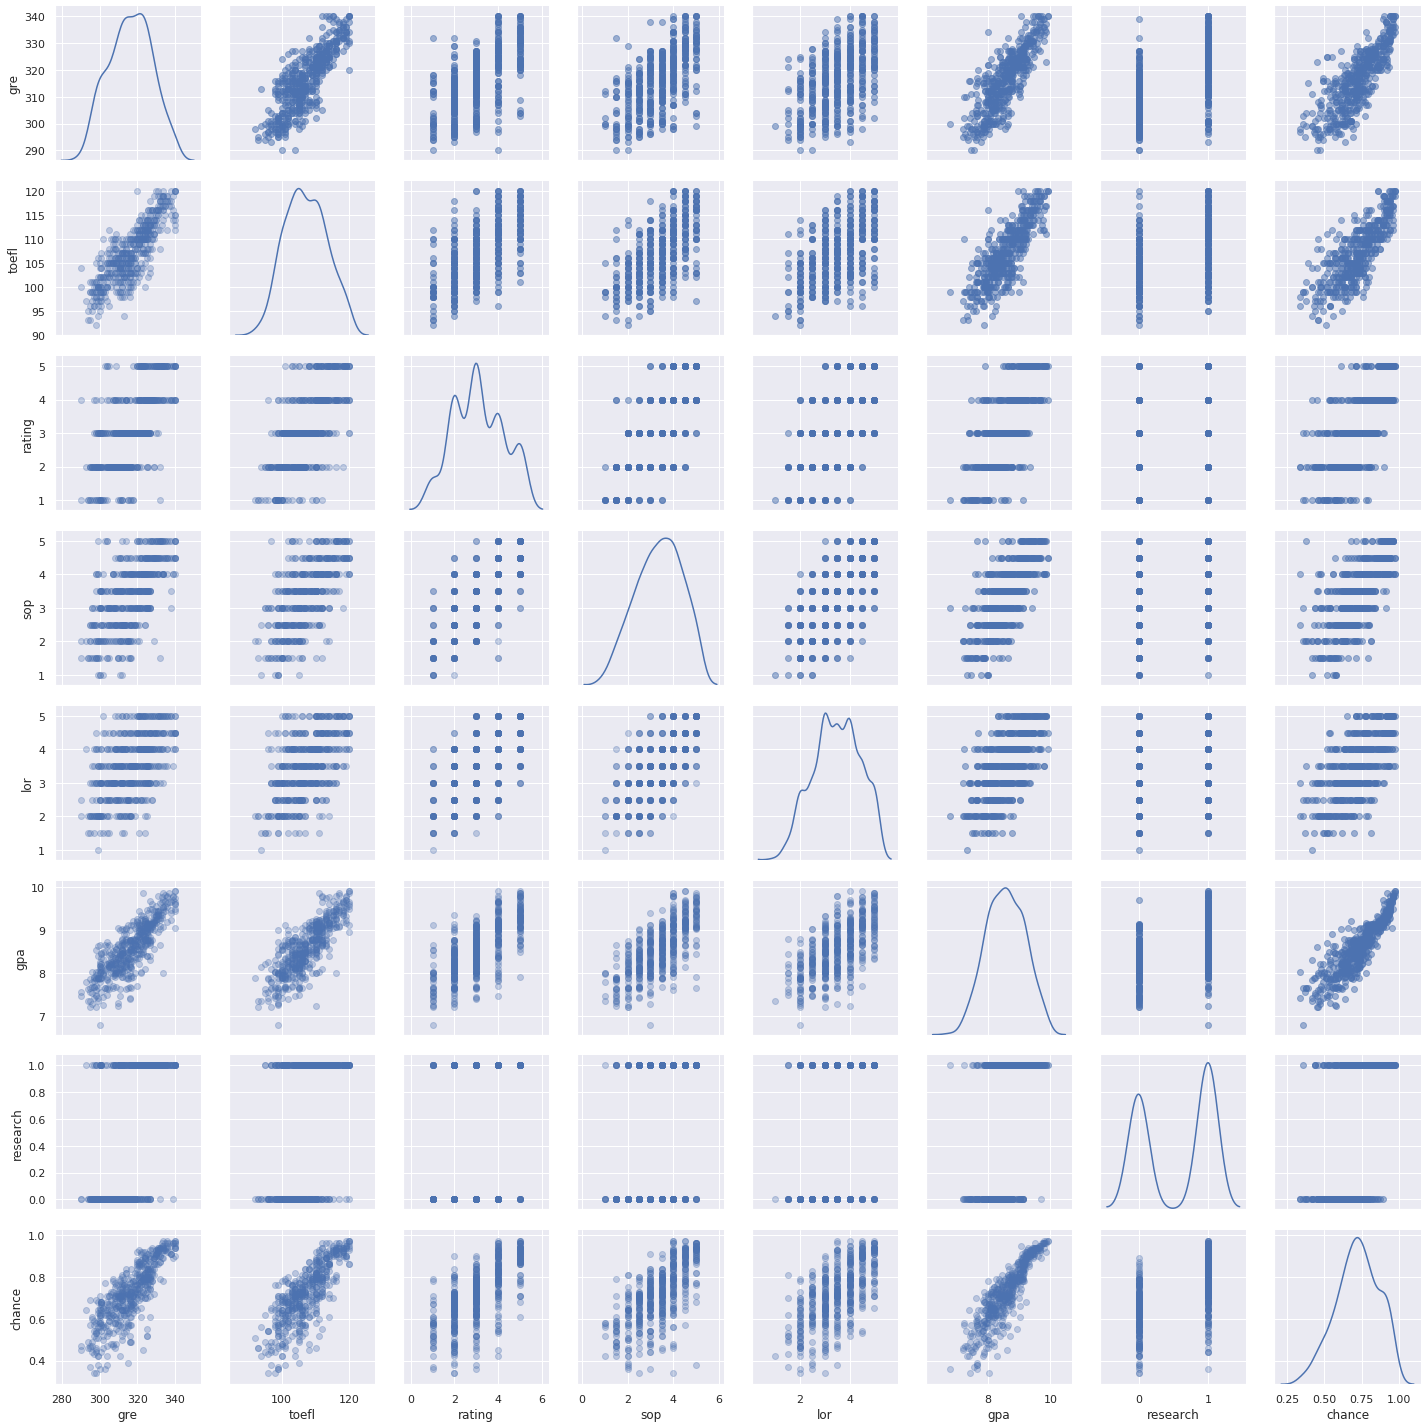

In [34]:
snsg = ga_data[['gre', 'toefl', 'rating', 'sop', 'lor', 'gpa', 'research','chance']]
g=sns.PairGrid(data=snsg, diag_sharey=False)
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter, alpha = 0.5)
g.map_lower(sns.regplot, fit_reg=False, scatter_kws={'alpha':0.3})
g.add_legend
plt.show()

### ***Boxplots and outliers***

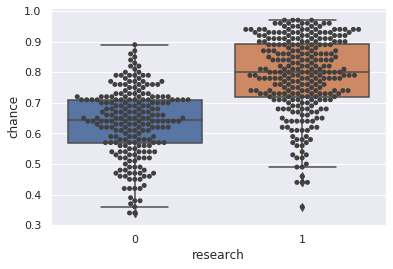

In [35]:
ax = sns.boxplot(x="research", y="chance", data=snsg)
ax = sns.swarmplot(x="research", y="chance", data=snsg, color=".25")

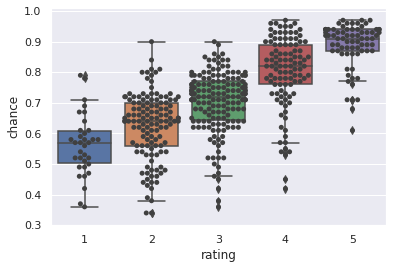

In [36]:
ax = sns.boxplot(x="rating", y="chance", data=snsg)
ax = sns.swarmplot(x="rating", y="chance", data=snsg, color=".25")

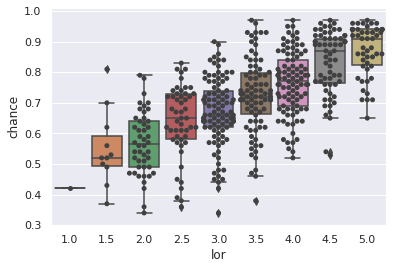

In [37]:
ax = sns.boxplot(x="lor", y="chance", data=snsg)
ax = sns.swarmplot(x="lor", y="chance", data=snsg, color=".25")

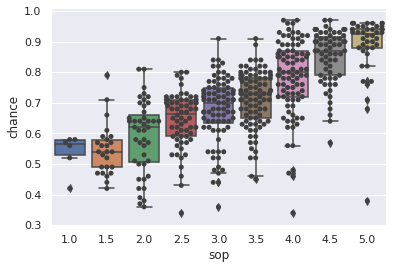

In [38]:
ax = sns.boxplot(x="sop", y="chance", data=snsg)
ax = sns.swarmplot(x="sop", y="chance", data=snsg, color=".25")

# <font color='green'>6. Building the Probablistic Logistic Regression (logit) Model</font>

As stated in the previous sections:
- The dependent variable (outcome) is 'chance', and all other features are indepednet variables (predictors). 
- X: Matrix of Predictors
- y: outcome (chance)

\begin{align}
    Y & = \beta_0\ +\ \beta_1*GPA +\  \beta_2*GRE +\  \beta_3*TOEFL +\  \beta_4*SOP +\  \beta_5*LOR +\  \beta_6*rating +\  \beta_7*research\\
    Y & = \ln( \frac{p}{1-p}) \\
    Y & = 1\ or\ 0\ (admit\ or\ reject)\\
    p & = \frac{1}{1+e^{-(\beta_0\ +\ \beta_1*GPA +\  \beta_2*GRE +\  \beta_3*TOEFL +\  \beta_4*SOP +\  \beta_5*LOR +\  \beta_6*rating +\  \beta_7*research)}}
\end{align}

p is the probability of the event that Y = 1 (admitted or offered)

### <font color='blue'>Thresholding y_train Data</font>
- The $85^{th}$ percentile value of the oucome variable is used for thresholding.

In [39]:
np.percentile(snsg['chance'],85)

0.89

In [40]:
logit = snsg[['gpa', 'gre', 'toefl',  'sop', 'lor', 'rating', 'research', 'chance']]
logit.columns = ['gpa', 'gre', 'toefl',  'sop', 'lor', 'rating', 'research', 'offer']
logit['offer'] = logit['offer'].apply(lambda x: 1 if x>=0.89 else 0)

<function matplotlib.pyplot.show(*args, **kw)>

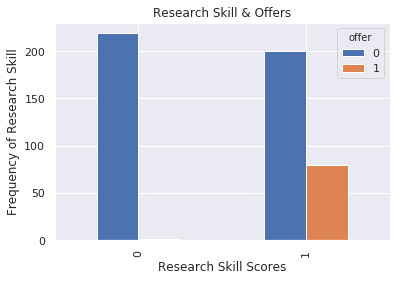

In [41]:
%matplotlib inline
pd.crosstab(logit.research,logit.offer).plot(kind='bar')
plt.title('Research Skill & Offers')
plt.xlabel('Research Skill Scores')
plt.ylabel('Frequency of Research Skill')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

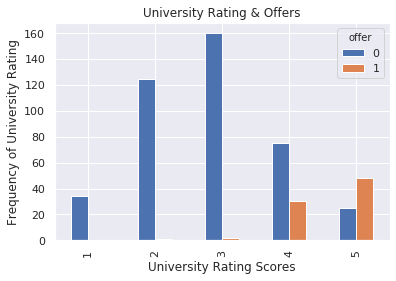

In [42]:
%matplotlib inline
pd.crosstab(logit.rating,logit.offer).plot(kind='bar')
plt.title('University Rating & Offers')
plt.xlabel('University Rating Scores')
plt.ylabel('Frequency of University Rating')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

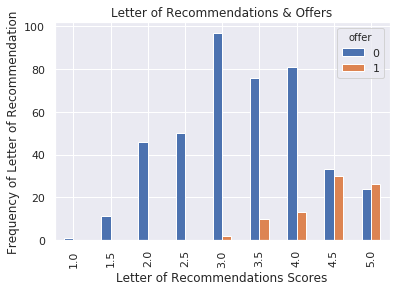

In [43]:
%matplotlib inline
pd.crosstab(logit.lor,logit.offer).plot(kind='bar')
plt.title('Letter of Recommendations & Offers')
plt.xlabel('Letter of Recommendations Scores')
plt.ylabel('Frequency of Letter of Recommendation')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

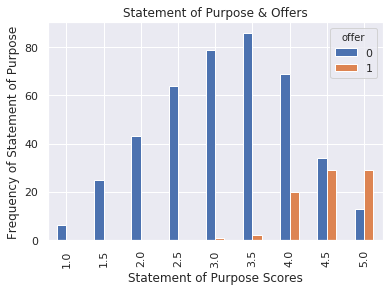

In [44]:
%matplotlib inline
pd.crosstab(logit.sop,logit.offer).plot(kind='bar')
plt.title('Statement of Purpose & Offers')
plt.xlabel('Statement of Purpose Scores')
plt.ylabel('Frequency of Statement of Purpose')
plt.show

### <font color='blue'>Create y, and x columns for coefficients determination</font>

In [45]:
y, X = dmatrices('offer ~ gpa + gre +toefl + sop + lor + rating + research', logit, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'gpa', 'gre', 'toefl', 'sop', 'lor', 'rating', 'research'], dtype='object')


In [46]:
# flatten y into a 1-D array
y = np.ravel(y)

### <font color='blue'>Normalize and Split data into training and test datasets</font>

In [47]:
X_scaled = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

### <font color='blue'>Fit the Logistic Regression(Logit) Model</font>

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### <font color='blue'>The computed coefficients</font>
- $\beta_0,\ \beta_1,\ \beta_2,\ \beta_3,\ \beta_4,\ \beta_5,\ \beta_6,\ \beta_7$

In [49]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[0.0]
1,gpa,[1.9626054187065256]
2,gre,[0.6727975703716529]
3,toefl,[1.0255743043149035]
4,sop,[0.16066549516476658]
5,lor,[0.2286462984356743]
6,rating,[0.4244305578862681]
7,research,[0.3477610065604746]


NB: GPA, TOEFL, GRE, University rating, Research-making skill, letters of recommendations, and SOP affect the chance of admit in the order they appear(most import to least important) according the trained model.

### <font color='blue'>predict class labels for the test set</font>

In [50]:
predicted = model.predict(X_test)
acc = metrics.accuracy_score(y_test, predicted)
print(f"The accuracy of the model is : {acc*100}%")

The accuracy of the model is : 98.0%


# <font color='green'>7. Conclusion</font>

The built Probablistic Logistic Regression (logit) model predict the chance of admission of a student to a certain college or university with an accuracy of 98\%. 

# The Script put together 

In [52]:
# Librariesand packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib as mp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from patsy import dmatrices
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline

#Read in data
ga_data = pd.read_csv("./graduate-admissions/Admission_Predict_Ver1.1.csv")

# Make the name of columns brief
ga_data=ga_data.rename(columns={'Serial No.':'no','GRE Score':'gre','TOEFL Score':'toefl',
                                'University Rating':'rating','SOP':'sop','LOR ':'lor','CGPA':'gpa',
                                'Research':'research','Chance of Admit ':'chance'})

#ILETS to TOEFL
def ieltsTotoefl(ielts):
    ielts=float(ielts)
    IELTS2TOEFL = {0.0:16, 1.0:16,2.0:16,3.0:16,
               4.0:16,4.5:33,5.0:40, 5.5:53, 
               6.0:69, 6.0:69,6.5:86,7.0:98,
               7.5:106,8.0:112,8.5:116,9.0:120}
    return IELTS2TOEFL[ielts]

# Convert paper-based toefl to ibt-based toefl
def pbteofl_ibttoefl(pbtoefl):
    pt_to_ibt = {677:120, 673:120,670:119,667:118,663:117,
                 662:117,661:117,660:117,657:116,653:115,
                 652:115,651:114,650:114,647:113,643:112,
                 642:112,641:111,640:111,637:110,633:109,
                 632:109,631:109,630:109,627:108,626:108,
                 625:107,624:107,623:106,620:105,619:105,
                 618:105,617:105,613:104,610:102,609:102,
                 608:101,607:101,603:100,602:100,601:100,
                 600:100,597:99,593:97,592:97,591:96,590:96,
                 587:95,583:93,582:93,581:92,580:92, 577:91,
                 573:89,572:89,571:88,570:88,567:87,563:85,
                 560:83,559:83,558:83,557:83,553:82,550:80,
                 547:78,543:76,542:76,541:76,540:76,537:75}
    return pt_to_ib[pbtoefl]

# A method for converting old GRE scale to revised GRE scale
vold=[800, 790, 780, 770, 760, 750, 740, 730, 720, 710, 700, 690, 680, 670, 660, 
      650, 640, 630, 620, 610, 600, 590, 580, 570, 560, 550, 540, 530, 520, 510, 
      500, 490, 480, 470, 460, 450, 440, 430, 420, 410, 400, 390, 380, 370, 360, 
      350, 340, 330, 320, 310, 300, 290, 280, 270,260, 250, 240, 230, 220, 210, 200]
vnew=[170, 170, 170, 170, 170, 169, 169, 168, 168, 167, 166, 165, 165, 164, 164,
      163, 162, 162, 161, 160, 160, 159, 158, 158, 157, 156, 156, 155, 154, 154,
      153, 152, 152, 151, 151, 150, 149, 149, 148, 147, 146, 146, 145, 144, 143, 
      143, 142, 141, 140, 139, 138, 137, 135, 134, 133, 132, 131, 130, 130, 130, 130]
qold=[800, 790, 780, 770, 760, 750, 740, 730, 720, 710, 700, 690, 680, 670, 660, 
      650, 640, 630, 620, 610, 600, 590, 580, 570, 560, 550, 540, 530, 520, 510, 
      500, 490, 480, 470, 460, 450, 440, 430, 420, 410, 400, 390, 380, 370, 360, 
      350, 340, 330, 320, 310, 300, 290, 280, 270, 260, 250, 240, 230, 220, 210, 200]
qnew=[166, 164, 163, 161, 160, 159, 158, 157, 156, 155, 155, 154, 153, 152, 152, 
      151, 151, 150, 149, 149, 148, 148, 147, 147, 146, 146, 145, 145, 144, 144, 
      144, 143, 143, 142, 142, 141, 141, 141, 140, 140, 140, 139, 139, 138, 138, 
      138, 137, 137, 136, 136, 136, 135, 135, 134, 134, 133, 133, 132, 132, 131, 131]


def get_newgreverbalscale(verbal_score): 
    if verbal_score > 170:
        if verbal_score in vold:
            idx=vold.index(verbal_score)
            return vnew[idx]
    else:
        return verbal_score
    
        
def get_newgrequanscale(quan_score):
    if quan_score>170:
        if quan_score in qold:
            idx=qold.index(quan_score)
            return qnew[idx]
    else:
        return quan_score
    
#Thresholding
snsg = ga_data[['gre', 'toefl', 'rating', 'sop', 'lor', 'gpa', 'research','chance']]
ogit = snsg[['gpa', 'gre', 'toefl',  'sop', 'lor', 'rating', 'research', 'chance']]
logit.columns = ['gpa', 'gre', 'toefl',  'sop', 'lor', 'rating', 'research', 'offer']
logit['offer'] = logit['offer'].apply(lambda x: 1 if x>=0.89 else 0)

# Create x, and y columns and flatten y
y, X = dmatrices('offer ~ gpa + gre +toefl + sop + lor + rating + research', logit, return_type="dataframe")
y = np.ravel(y)

# Normalize and split dataset into training and testing datasets
X_scaled = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Fitting the logistic regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Coefficients of the created model
print(f"Coefficients:{pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))}")

# Model accuracy
predicted = model.predict(X_test)
acc = metrics.accuracy_score(y_test, predicted)
print(f"The accuracy of the model is : {acc*100}%")

Coefficients:           0                      1
0  Intercept                  [0.0]
1        gpa   [1.9626054187065256]
2        gre   [0.6727975703716529]
3      toefl   [1.0255743043149035]
4        sop  [0.16066549516476658]
5        lor   [0.2286462984356743]
6     rating   [0.4244305578862681]
7   research   [0.3477610065604746]
The accuracy of the model is : 98.0%
